In [40]:
import math
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import pyplot
from IPython.display import display, Markdown

In [2]:
#use english units or comment 
a=1003.2 #ft/s or 684mph at 25000ft
v_stall = 200.65 #ft/s = 118 kts
v_cruise = 590 #ft/s
v_to = 220.7 #ft/s take off or lift off
rho = 0.03133 #lbf/ft^3 or 0.001066 slugs/ft^3
W_S_to = 105.4 
W_S_stall = 98.90 #lbs/ft^2
W_S_cruise = 1043 #lbs/ft^2
W_0 = 65808 #lbs, 29850 kg
W_to = 65353 #lbs
A=12

In [3]:
S_wing=W_to/W_S_to
print("Wing Area in ft",S_wing,"\n")
b=(A*S_wing)**0.5
print("Wing Span in ft",b)

Wing Area in ft 620.0474383301707 

Wing Span in ft 86.25873439810051


In [4]:
q = 0.5*rho*(v_cruise**2)
Cl_design = W_S_cruise/q
print("Cl_design based on cruise ",Cl_design)

Cl_design based on cruise  0.19127133360773957


In [ ]:
Fuse = 0.37*(W_to**0.5) #Table 6.3 (page 157) fuse lenth deisgn
print("Fuse length: ",Fuse,"ft or",Fuse/3.281,"meters")

Fuse length:  94.58766145750724 ft or 28.82891236132497 meters


In [ ]:
b_HT = 26.2467 #ft. this is your ELEVETAOR guestimated span about 8-meters
# cE=[10, 11, 12, 13] #this is your MAIN WING chord range in inches
c_HT = 0.9 #this coefficent are in reyman books provided the type of plane on table. 
L_HT = 0.52*Fuse  #destance from Leading edge of wing to leading edge of elevator. about 50-55% for twin turboprop 
C_Wmac = 7.73 #mean aerodynamic chord for the wing (obtain it from xflr wing desing)
S_HT=(c_HT*C_Wmac*S_wing)/L_HT
print('Elevator Area S_HT:',round(S_HT,4), '\nRoot Chord:',round(2*S_HT/(1.6*b_HT),3),'\nTip Chord:',round((2*S_HT)/(2.6667*b_HT),3)) #all in ft

Elevator Area S_HT: 87.7019 
Root Chord: 4.177 
Tip Chord: 2.506


In [ ]:
y_VT = 14.7638 #ft. this is your Fin guestimated span about 4.5 meters. root chord = 11.1549 or 3.4m
# cE=[10, 11, 12, 13] #this is your MAIN WING chord range in inches
c_VT = 0.08 #this coefficent are in reyman books provided the type of plane on table. 
L_VT = 0.54*Fuse  #destance from Leading edge of wing to leading edge of elevator. about 50-55% for twin turboprop 
b_W = 86.25873439810051 #wing span (obtain it from xflr wing desing)
S_VT=(c_VT*b_W*S_wing)/L_VT
print('Fin Area S_VT:',round(S_VT,3), '\nRoot Chord:',round(2*S_VT/(1.61*y_VT),3),'\nTip Chord:',round((2*S_VT)/(2.63934*y_VT),3)) #all in ft

Fin Area S_VT: 83.77 
Root Chord: 7.048 
Tip Chord: 4.3


In [41]:
#Wing leading edge location to determine cg 
#this assumes our nose is the origin
C_Vmac = 5.78 #ft
C_Hmac = 3.41 #ft
wing_x_v = 0.46*Fuse - (0.25*C_Wmac + .75*C_Vmac) #remaining fuse minuse the .75*C_macW and .75*C_Vmac
print("X_location_VT ", wing_x_v)
wing_x_h = 0.46*Fuse - (0.25*C_Wmac + .75*C_Vmac) #remaining fuse minuse the .75*C_macW and .75*C_Hmac
print("X_location_HT ", wing_x_h)
wing_x = 0.5*(wing_x_v+wing_x_h)
print("X_location_average ", wing_x)

NameError: ignored

In [42]:
data= pd.read_excel("/content/drive/MyDrive/Colab Notebooks/baseline_data.xlsx")
# data= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/baseline_data.csv"
data

,Aircraft,pass,b,s,w_e,w_0,s_to,r,v_c,E,T,F,T_P,M_P,BSFC,w_d,AR,t_w,w_s
0,Q100,37.000000,85.000000,585.000000,23098.000000,34500,3280.000000,1020.00,270.00,x2 PW120,3600,5602.850000,2400.0,2100.000000,0.48500,921.000000,12.320000,0.104348,58.974359
1,Q200,37.000000,85.000000,585.000000,23098.000000,36300,3280.000000,1125.00,289.00,x2 PW123C/D,4300,5602.850000,3000.0,2400.000000,0.47000,992.000000,12.320000,0.118457,62.051282
2,Q300,50.000000,90.000000,605.000000,26000.000000,43000,3870.000000,924.00,287.00,x2 PW123/B,4760,5602.850000,3000.0,2400.000000,0.47000,992.000000,13.360000,0.110698,71.074380
3,Q400,82.000000,93.250000,689.000000,39284.000000,67200,4675.000000,1100.00,330.00,x2 PW150,10142,11568.040000,6200.0,5000.000000,0.43300,1583.000000,12.600000,0.150923,97.532656
4,ATR 72-600,70.000000,88.750000,657.000000,29762.000000,50706,4485.000000,825.00,280.00,x2 PW127M,4950,11000.000000,3200.0,2750.000000,0.45900,1060.000000,12.000000,0.097622,77.178082
5,ATR 42-300,48.000000,74.416667,587.000000,22680.000000,37257,NaN,459.00,270.00,x2 PW120,3600,9921.000000,2400.0,2100.000000,0.48500,921.000000,11.080000,0.096626,63.470187
6,ATR 42-400,48.000000,74.416667,587.000000,24361.000000,40123,NaN,794.00,261.00,x2 PW121A,3960,9921.000000,2400.0,2100.000000,0.48500,921.000000,11.080000,0.098697,68.352641
7,ATR 42-500/600,48.000000,74.416667,587.000000,25463.000000,41005,NaN,716.00,300.00,x2 PW127E/M,4320,9921.000000,3200.0,2750.000000,0.45900,1060.000000,11.080000,0.105353,69.855196
8,Saab 340,34.000000,70.333333,450.000000,19000.000000,29000,4220.000000,470.00,283.00,x2 PW CT7-5A,3470,5690.000000,NaN,NaN,0.47600,783.000000,10.992840,0.119655,64.444444
9,Saab 2000,58.000000,81.250000,600.000000,30424.000000,50265,NaN,1549.00,359.00,x2 RR AE-2100P,8304,9370.000000,NaN,NaN,0.46000,1740.000000,11.002604,0.165204,83.775000


# New Section

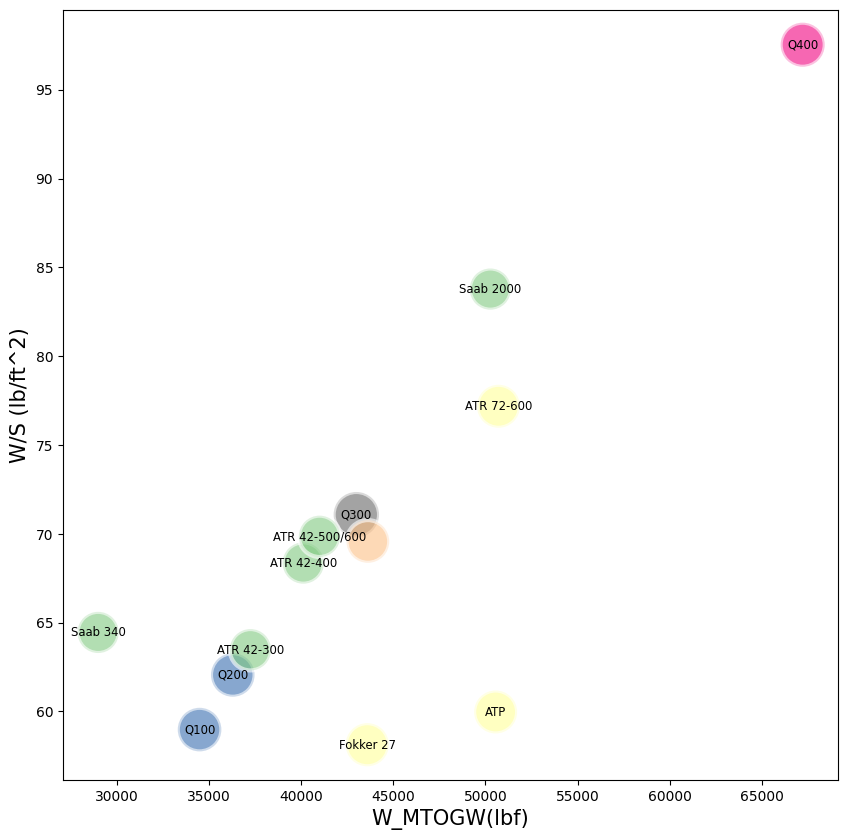

In [114]:
plt.figure(figsize=(10,10))
plt.style.use('default')
pyplot.scatter(x=data.w_0, y=data.w_s, s=80*data.AR, c=data.AR, cmap ='Accent', alpha=0.6, edgecolors='white', linewidth=3)
plt.xlabel('W_MTOGW(lbf)', size = 15)
plt.ylabel('W/S (lb/ft^2)', size = 15)
for i in range(data.shape[0]-1):
    plt.text(data.w_0[i],data.w_s[i],str(data.Aircraft[i]), position=(data.w_0[i]-0.2, data.w_s[i]-0.2), fontsize='small', ha='center')
# plt.savefig("graph05.svg")
# plt.text(data.mass[i],data.alt[i],str(data.size[i])+'U', position=(data.mass[i], data.alt[i]), fontsize='medium', ha='left')
plt.savefig('fgraph05.pdf')

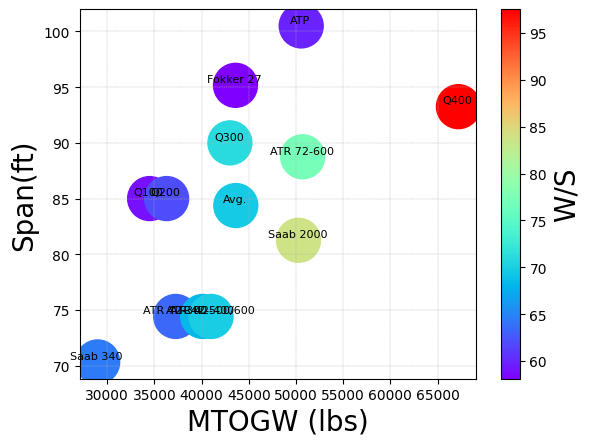

In [123]:
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": "Helvetica",
# })
# plt.figure(figsize=(20,20))
plt.style.use('default')
plt.grid(linestyle = '--', linewidth = 0.3)
plt.xlabel('MTOGW (lbs)', size = 20)
plt.ylabel('Span(ft)', size = 20)
plt.scatter(data.w_0, data.b, c = data.w_s, cmap='rainbow' , s=1000)
for i in range(data.shape[0]):
    plt.text(data.w_0[i],data.b[i], str(data.Aircraft[i]), position=(data.w_0[i]-100, data.b[i]+1), fontsize=8,va='top', ha='center')
cbar=plt.colorbar(orientation = 'vertical');
cbar.set_label('W/S',size = 20)
# set_xticklabels(data["Aircraft"].unique().astype(str), rotation='vertical')

# plt.savefig("wing_loading_.png")
plt.savefig('SWvsAR_.pdf')
# plt.savefig('power.svg')

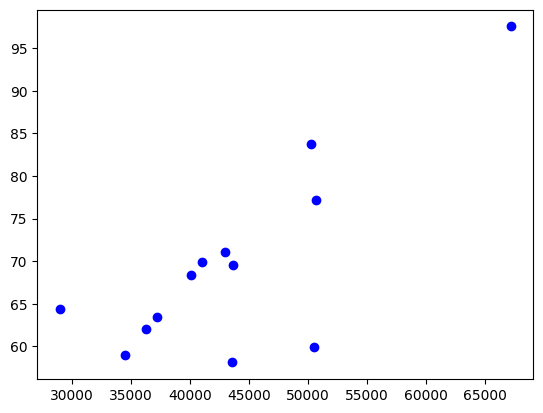

In [19]:
# data.w_0[i]
# a_ratio = [1,2,3,4,5,6,7,8,9,10,11,12,13]
# plt.scatter(data.w_0, data.w_s, color = "blue")
# plt.plot(data.w_s, data.b, color = "red")
# plt.plot(data.AR, data.b, color = "green")

#Save the figure
# plt.savefig("figure.png", dpi = 300, bbox_inches = "tight")
#Show the figure
plt.show()
